SA on game comments

model: TFIDF (max_features=20000) + random forest (or XGboost or Adaboost whatsoever)

No data augmentation (RUS, EDA, masked) is performed

The model is trained on a balanced dataset

Load the whole dataset

In [1]:
# load the pre-sampled dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path


# set some parameters of this training
DATASET_LIST = [120, 240, 480]
DATASET_LIST_INDEX = 0
DATASET_IS_BALANCED = True


dataset_folder_path = Path(f'../../dataset/sa/sampled_{DATASET_LIST[DATASET_LIST_INDEX]}k_2023-12-16/')
dataset_valid_folder_path = Path('../../dataset/sa/sampled_valid_2023-12-16/')

dataset_val_bal = pd.read_pickle(dataset_valid_folder_path / 'validation_balanced.pkl')
dataset_val_imbal = pd.read_pickle(dataset_valid_folder_path / 'validation_imbalanced.pkl')

if DATASET_IS_BALANCED:
    dataset_traintest = pd.read_pickle(dataset_folder_path / f'dataset_bal_sampled_{DATASET_LIST[DATASET_LIST_INDEX]}k.pkl')
else:
    dataset_traintest = pd.read_pickle(dataset_folder_path / f'dataset_imbal_sampled_{DATASET_LIST[DATASET_LIST_INDEX]}k.pkl')

In [2]:
dataset_val_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301344 entries, 2447379 to 2758277
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         301344 non-null  int64 
 1   app_id        301344 non-null  int64 
 2   app_name      301344 non-null  object
 3   review_text   301344 non-null  object
 4   review_score  301344 non-null  int64 
 5   review_votes  301344 non-null  int64 
 6   num_of_words  301344 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.4+ MB


In [3]:
temp = dataset_val_bal.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,150672
1,1,150672


In [4]:
dataset_val_imbal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925305 entries, 1752495 to 4683282
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         925305 non-null  int64 
 1   app_id        925305 non-null  int64 
 2   app_name      925305 non-null  object
 3   review_text   925305 non-null  object
 4   review_score  925305 non-null  int64 
 5   review_votes  925305 non-null  int64 
 6   num_of_words  925305 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 56.5+ MB


In [5]:
temp = dataset_val_imbal.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,150928
1,1,774377


In [6]:
dataset_traintest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 3758070 to 3855230
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         120000 non-null  int64 
 1   app_id        120000 non-null  int64 
 2   app_name      120000 non-null  object
 3   review_text   120000 non-null  object
 4   review_score  120000 non-null  int64 
 5   review_votes  120000 non-null  int64 
 6   num_of_words  120000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 7.3+ MB


In [7]:
temp = dataset_traintest.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,60000
1,1,60000


---

In [8]:
X_imbal_valid = dataset_val_imbal['review_text']
y_imbal_valid = dataset_val_imbal['review_score']

X_bal_valid = dataset_val_bal['review_text']
y_bal_valid = dataset_val_bal['review_score']

---

Any data augmentation plz add here

In [9]:
# TODO: add data augmentation here

---

Create training and testing dataset from here :D

Sample a fixed amount of comments from here 

baseline (imbalanced): positive comments : negative comments = 5:1

baseline (balanced): positive comments : negative comments = 1:1

In [10]:
# define constants

TEST_RATIO = 0.1            # ratio of test set to the whole train-test dataset

In [11]:
X_train_test = dataset_traintest['review_text']
y_train_test = dataset_traintest['review_score']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train_test,
    y_train_test,
    random_state=13,
    test_size=TEST_RATIO)

In [13]:
print('Training set')
print(len(X_train))
print(len(y_train))
print()
print('Test set')
print(len(X_test))
print(len(y_test))
print()
print('Validation (imbalanced) set')
print(len(X_imbal_valid))
print(len(y_imbal_valid))
print()
print('Validation (balanced) set')
print(len(X_bal_valid))
print(len(y_bal_valid))

print()
print()

print('Training set')
print(pd.Series(y_train).value_counts())
print()
print('Test set')
print(pd.Series(y_test).value_counts())
print()
print('Validation (imbalanced) set')
print(pd.Series(y_imbal_valid).value_counts())
print()
print('Validation (balanced) set')
print(pd.Series(y_bal_valid).value_counts())

print()
print()

print('training set datatype')
print(type(X_train))
print(type(y_train))
print()
print('test set datatype')
print(type(X_test))
print(type(y_test))
print()
print('validation (imbalanced) set datatype')
print(type(X_imbal_valid))
print(type(y_imbal_valid))
print()
print('validation (balanced) set datatype')
print(type(X_bal_valid))
print(type(y_bal_valid))

Training set
108000
108000

Test set
12000
12000

Validation (imbalanced) set
925305
925305

Validation (balanced) set
301344
301344


Training set
review_score
0    54060
1    53940
Name: count, dtype: int64

Test set
review_score
1    6060
0    5940
Name: count, dtype: int64

Validation (imbalanced) set
review_score
1    774377
0    150928
Name: count, dtype: int64

Validation (balanced) set
review_score
0    150672
1    150672
Name: count, dtype: int64


training set datatype
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>

test set datatype
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>

validation (imbalanced) set datatype
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>

validation (balanced) set datatype
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


---

Sanity check

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

print()
print()

# distribution of +ve and -ve comments in train and test set
import collections

print('training set')
print(collections.Counter(y_train))
print('pos / neg ratio =', float(collections.Counter(y_train)[1] / collections.Counter(y_train)[0]))
print()
print('testing set')
print(collections.Counter(y_test))
print('pos / neg ratio =', float(collections.Counter(y_test)[1] / collections.Counter(y_test)[0]))

108000
108000
12000
12000


training set
Counter({0: 54060, 1: 53940})
pos / neg ratio = 0.9977802441731409

testing set
Counter({1: 6060, 0: 5940})
pos / neg ratio = 1.02020202020202


---

apply cleaning before further creating a subset of comments for training data

data cleaning is performed on training and testing dataset first

same cleaning will be performed on validation dataset after training

In [15]:
import sys
 
# setting path
sys.path.append('../')

import str_cleaning_functions

In [18]:
# X_train = str_cleaning_functions.cleaning_pyarr(list(X_train.ravel()))
# X_train = np.array(X_train)

X_train = str_cleaning_functions.cleaning_arr(X_train)
X_train = X_train.to_numpy()

In [19]:
# X_test = str_cleaning_functions.cleaning_pyarr(list(X_test.ravel()))
# X_test = np.array(X_test)

X_test = str_cleaning_functions.cleaning_arr(X_test)
X_test = X_test.to_numpy()

In [20]:
# lazy to change the variable names

X_train_subset = X_train
y_train_subset = y_train

---

Build the model and pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

In [22]:
# TODO: can do sth on the max_features
# e.g. selecting words that appear more than N times in the training set

from collections import Counter

words_counter = Counter([s for sublist in list(X_train) for s in sublist.split()])

In [23]:
print("Total number of discrete words:", len(words_counter.items()))
print()
for n in [5000, 1000, 500, 100, 50, 25, 10]:
    print("Number of words with count >= {}: {}".format(n, len(Counter({k:c for k,c in words_counter.items() if c >= n}))))

# len(Counter({k:c for k,c in words_counter.items() if c >= 100}))

Total number of discrete words: 64247

Number of words with count >= 5000: 126
Number of words with count >= 1000: 737
Number of words with count >= 500: 1231
Number of words with count >= 100: 3226
Number of words with count >= 50: 4608
Number of words with count >= 25: 6486
Number of words with count >= 10: 10474


In [24]:
temp2 = pd.DataFrame(words_counter.items())
temp2.columns = ['Common_words','count']
temp2.style.background_gradient(cmap='Blues')
temp2['count'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count     64247.000000
mean         61.813641
std        1034.615342
min           1.000000
1%            1.000000
10%           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
90%          25.000000
99%        1180.540000
max      209622.000000
Name: count, dtype: float64

In [25]:
vect = CountVectorizer(stop_words="english", max_features=5000)
# vect = CountVectorizer(stop_words="english", max_features=20000)
tfidf = TfidfTransformer()
model = RandomForestClassifier()

In [26]:
# we first create features through count vectorizer over training set
# we then use this vectorizer and apply to the test set (.transform() only)
X_train_subset_vectorized = vect.fit_transform(X_train_subset)

In [27]:
print(X_train_subset_vectorized.shape)
print()
print()
print(vect.get_feature_names_out())

(108000, 5000)


['aa' 'aaa' 'abandon' ... 'zombi' 'zone' 'zoom']


In [28]:
pipeline_train = Pipeline([
    ('tfidf', tfidf),
    ('model', model)
])

In [29]:
sa_classifier = pipeline_train.fit(X_train_subset_vectorized, y_train_subset)

Save the models

In [31]:
from datetime import datetime
import pickle

filename = Path('sa_tfidf-rf-20000_{}k_{}_{}_model.sav'.format(
    DATASET_LIST[DATASET_LIST_INDEX],
    'bal' if DATASET_IS_BALANCED else 'imbal',
    datetime.today().strftime("%Y-%m-%d")))
pickle.dump(model, open(filename, 'wb'))

filename = Path('sa_tfidf-rf-20000_{}k_{}_{}_count-vectorizer.pkl'.format(
    DATASET_LIST[DATASET_LIST_INDEX],
    'bal' if DATASET_IS_BALANCED else 'imbal',
    datetime.today().strftime("%Y-%m-%d")))
pickle.dump(vect, open(filename, 'wb'))

filename = Path('sa_tfidf-rf-20000_{}k_{}_{}_tfidf.pkl'.format(
    DATASET_LIST[DATASET_LIST_INDEX],
    'bal' if DATASET_IS_BALANCED else 'imbal',
    datetime.today().strftime("%Y-%m-%d")))
pickle.dump(tfidf, open(filename, 'wb'))

---

Load the models (optional)

In [35]:
from datetime import datetime
import pickle

models_date = datetime(2023, 12, 12)

filename = Path('sa_tfidf-rf-20000_model_{}.sav'.format(models_date.strftime("%Y-%m-%d")))
model = pickle.load(open(filename, 'rb'))

filename = Path('sa_tfidf-rf-20000_count-vectorizer_{}.pkl'.format(models_date.strftime("%Y-%m-%d")))
vect = pickle.load(open(filename, 'rb'))

filename = Path('sa_tfidf-rf-20000_tfidf_{}.pkl'.format(datetime.today().strftime("%Y-%m-%d")))
tfidf = pickle.load(open(filename, 'rb'))

---

Evaluation

In [32]:
pipeline_test = Pipeline([
    ('vect', vect),
    ('tfidf', tfidf),
    ('model', model),
])

In [33]:
y_test_pred_prob_raw = pipeline_test.predict_proba(X_test)

y_test_pred = np.argmax(y_test_pred_prob_raw, axis=1)

# creating single class label probability for ploting ROC curve
y_test_pred_prob = y_test_pred_prob_raw if len(np.unique(y_test)) > 2 \
                else np.array([y_test_pred_prob_raw[i, pred] for i, pred in enumerate(list(y_test_pred))])

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

def print_classification_report(y_true,y_pred):
    cfmat = confusion_matrix(y_true,y_pred)
    print('Classification report: \n',classification_report(y_true,y_pred))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_true, y_pred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_true,y_pred)))

In [35]:
print_classification_report(y_test,y_test_pred)

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      5940
           1       0.82      0.78      0.80      6060

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



TN - True Negative 4914
FN - False Negative 1346
TP - True Positive 4714
FP - False Positive 1026
Accuracy Rate: 0.8023333333333333
Misclassification Rate: 0.19766666666666666
F1-Score: 0.8022784106696305
ROC-AUC 0.8025802580258027


In [36]:
def create_confusion_matrix_graph(y_true, y_pred, title=None, save=False, save_filename=None):

    # pre checking
    if save and save_filename == None:
        print("save_filename camnot be empty, function exits.")
        return


    ax = sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='')

    ax.set_title(title)
    ax.set_xlabel("predicted label")
    ax.set_ylabel('true label')
    ax.set_xticklabels(['[0]\nNegative', '[1]\nPositive'])
    ax.set_yticklabels(['Negative [0]', 'Positive [1]'])

    if save:
        plt.savefig(save_filename, dpi=600, faccecolor='w')

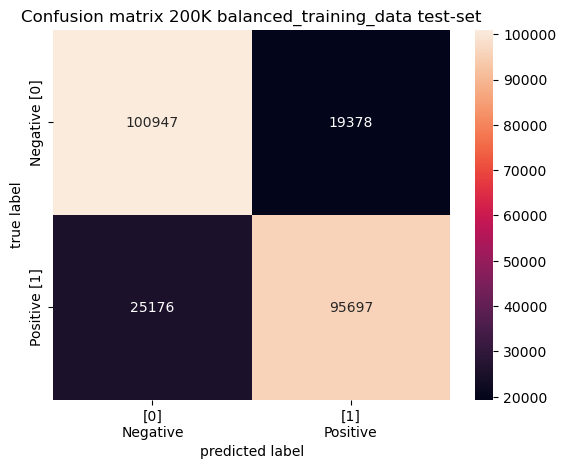

In [41]:
create_confusion_matrix_graph(y_test, y_test_pred, 'Confusion matrix all-training-data test-set', False)

In [37]:
# plot ROC curve for binary class classification

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_binary(y_test, y_pred, title=None, save=False, save_filename=None):

    # pre-checking
    if save and save_filename == None:
        print('save_filename cannot be empty. Function exits.')
        return


    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
        roc_auc[i] = auc(fpr[i], tpr[i])

    print(roc_auc_score(y_test, y_pred))
    plt.figure(dpi=600)
    plt.plot(fpr[1], tpr[1], label="ROC curve (area = {:0.4f})".format(roc_auc_score(y_test, y_pred)))

    # random-guess line
    plt.plot([0, 1], [0, 1], "k--")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title if title else 'Receiver operating characteristic (ROC)')
    plt.legend(loc='lower right')

    # if save:
    #     plt.savefig(f'steam-games-reviews-analysis-sentiment-analysis_ROC-curve_{datetime.now().strftime("%Y%m%d%H%M%S")}.png', dpi=600, facecolor='w')

    # plt.show() should come AFTER than plt.savefig
    # as plt.show() clears the whole thing -> anything after wards will happen on a new blank figure
    plt.show()

0.5179768949117134


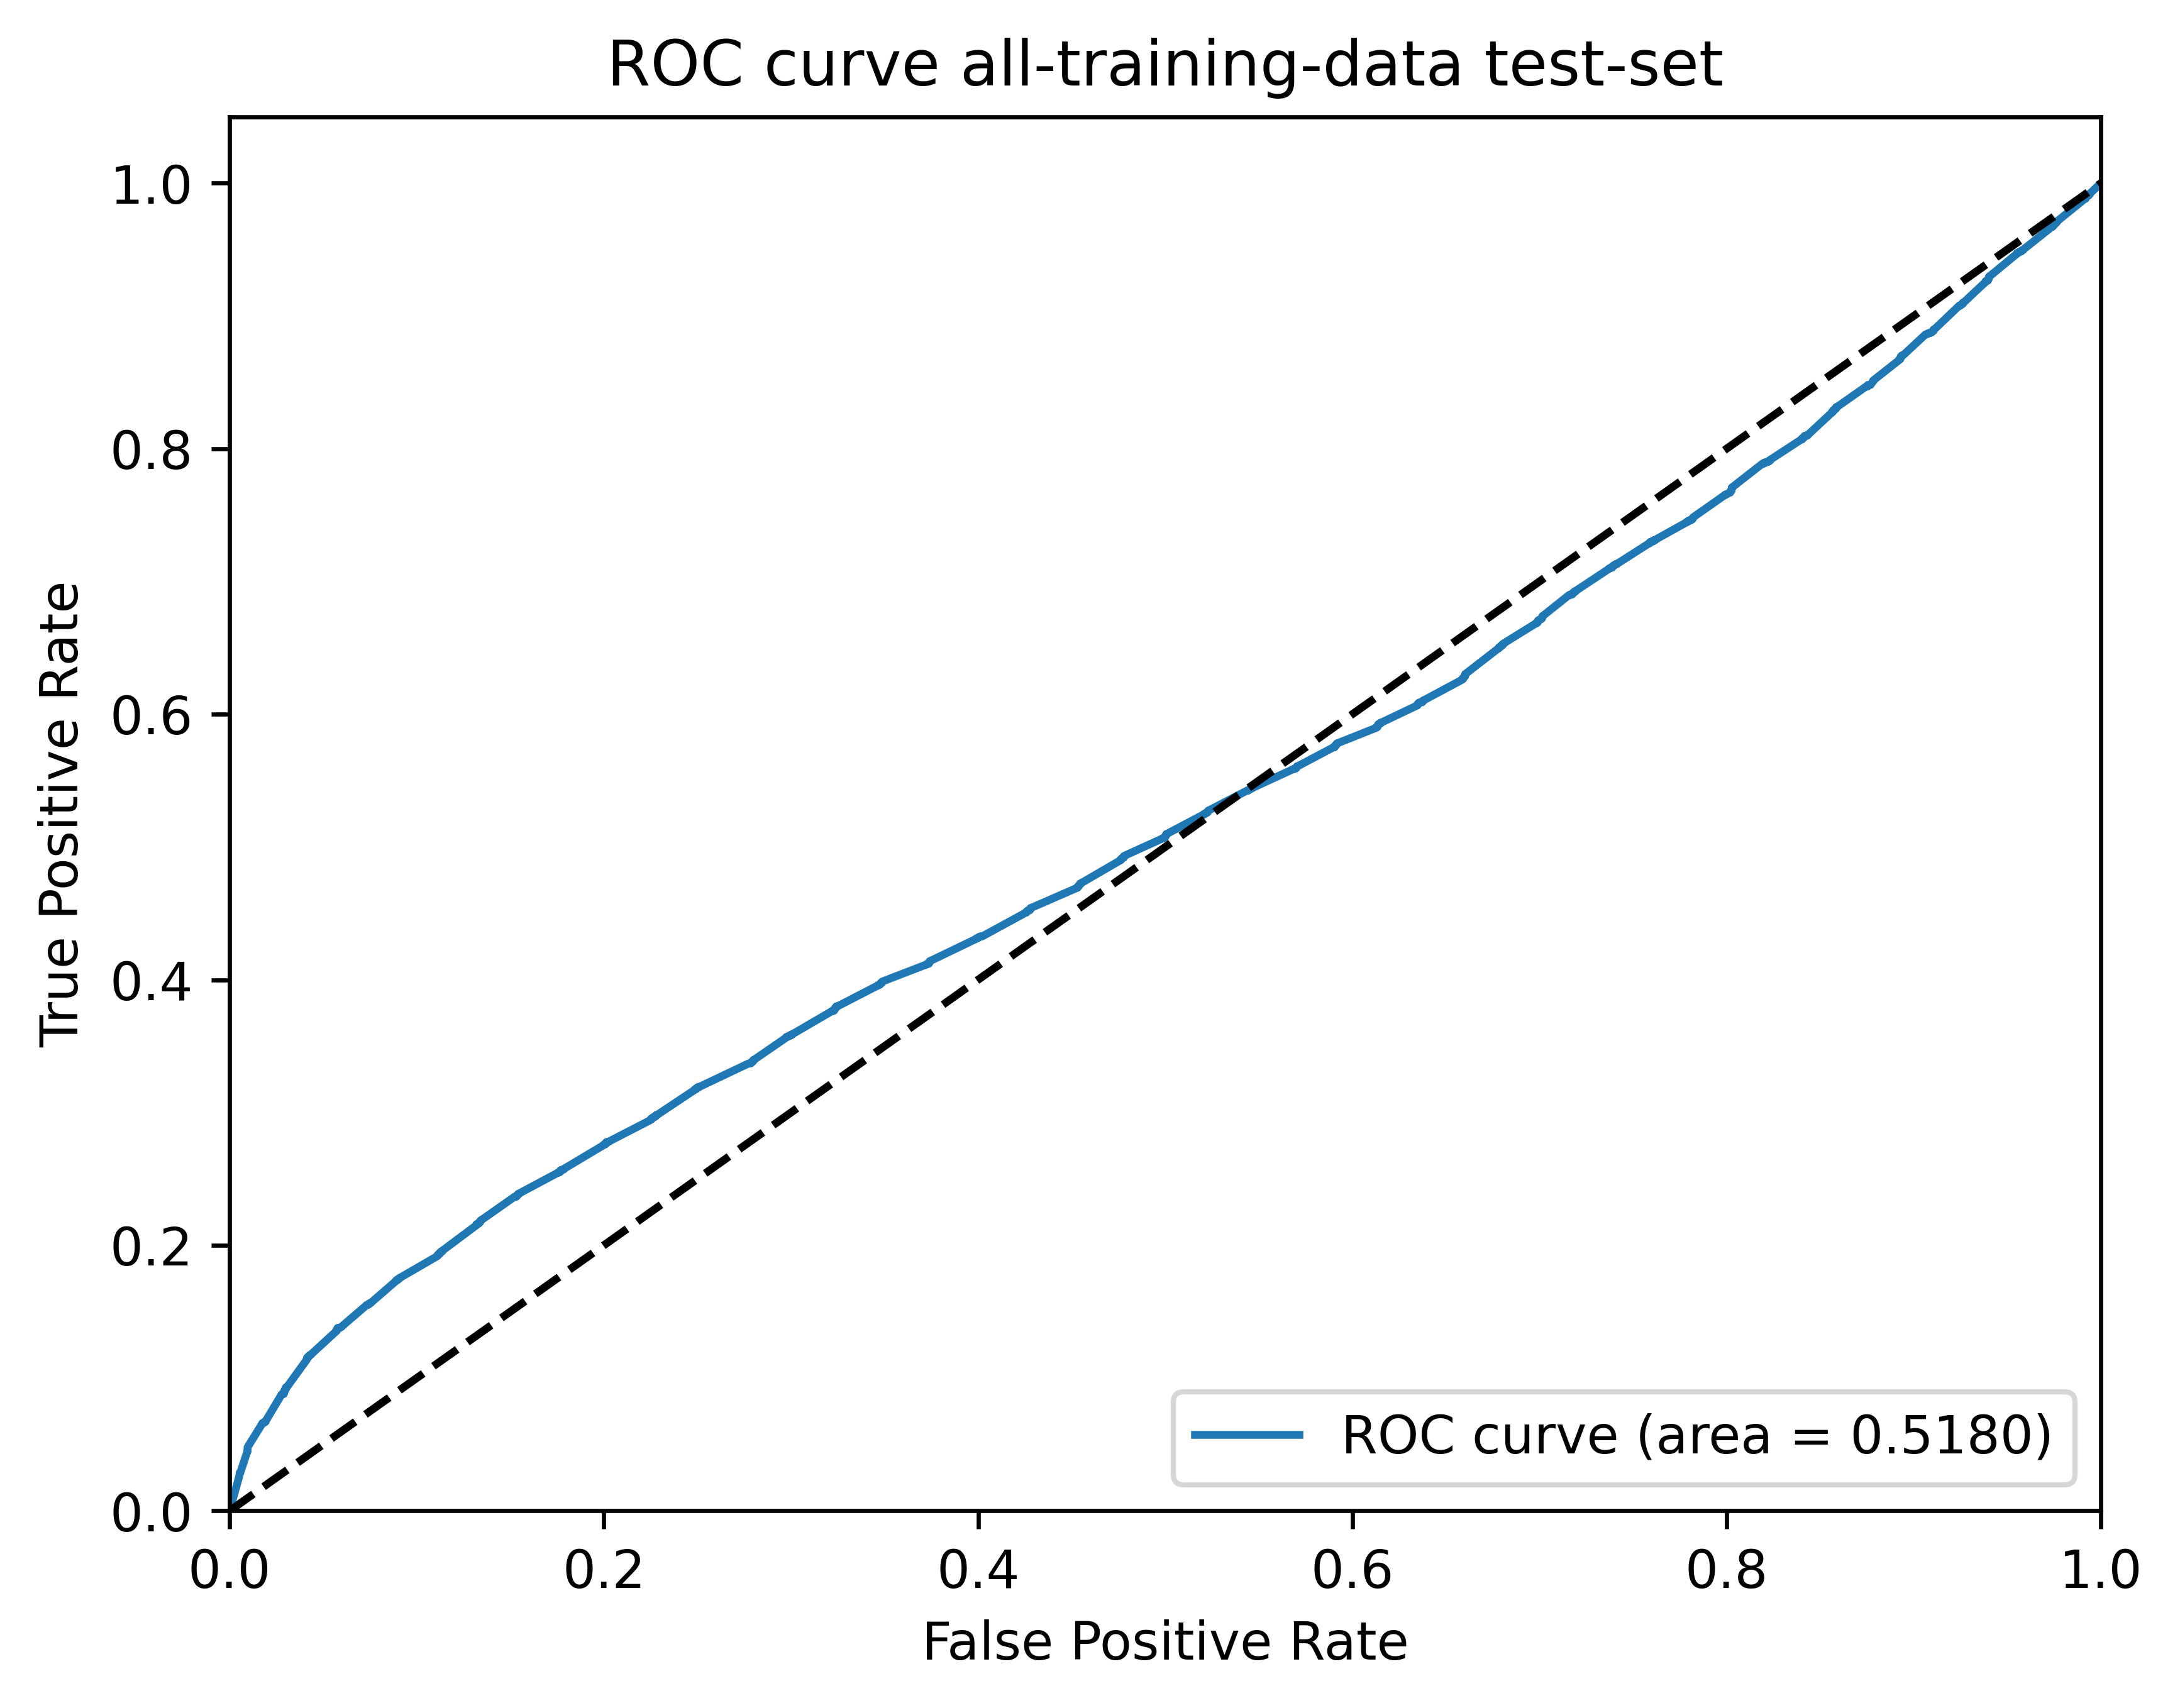

In [38]:
plot_roc_curve_binary(y_test, y_test_pred_prob, title='ROC curve all-training-data test-set', save=False)

on fixed balanced validation set

In [56]:
# data cleaning before evaluation

X_bal_valid = str_cleaning_functions.cleaning_arr(X_bal_valid)
X_bal_valid = X_bal_valid.to_numpy()
y_bal_valid = y_bal_valid.to_numpy()

X_imbal_valid = str_cleaning_functions.cleaning_arr(X_imbal_valid)
X_imbal_valid = X_imbal_valid.to_numpy()
y_imbal_valid = y_imbal_valid.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [57]:
y_bal_valid_pred_prob_raw = pipeline_test.predict_proba(X_bal_valid)

y_bal_valid_pred = np.argmax(y_bal_valid_pred_prob_raw, axis=1)

y_bal_valid_pred_prob = y_bal_valid_pred_prob_raw if len(np.unique(y_bal_valid_pred)) > 2 \
                else np.array([y_bal_valid_pred_prob_raw[i, pred] for i, pred in enumerate(list(y_bal_valid_pred))])

In [58]:
print_classification_report(y_bal_valid, y_bal_valid_pred)

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81    150672
           1       0.82      0.78      0.80    150672

    accuracy                           0.81    301344
   macro avg       0.81      0.81      0.81    301344
weighted avg       0.81      0.81      0.81    301344



TN - True Negative 125535
FN - False Negative 32674
TP - True Positive 117998
FP - False Positive 25137
Accuracy Rate: 0.8081561272167357
Misclassification Rate: 0.1918438727832643
F1-Score: 0.8080360414237708
ROC-AUC 0.8081561272167357


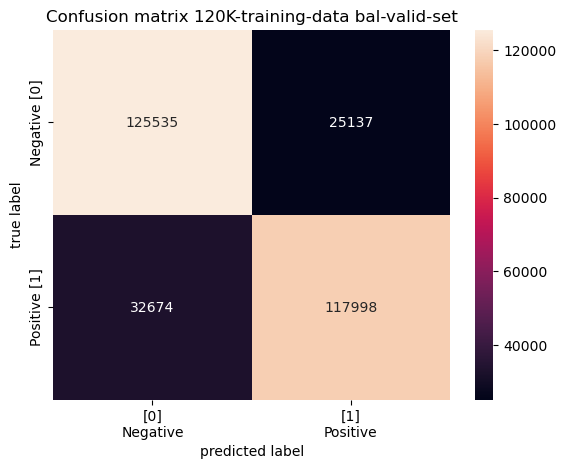

In [59]:
create_confusion_matrix_graph(y_bal_valid, y_bal_valid_pred, f'Confusion matrix {DATASET_LIST[DATASET_LIST_INDEX]}K-training-data bal-valid-set', save=False)

0.5144539031102926


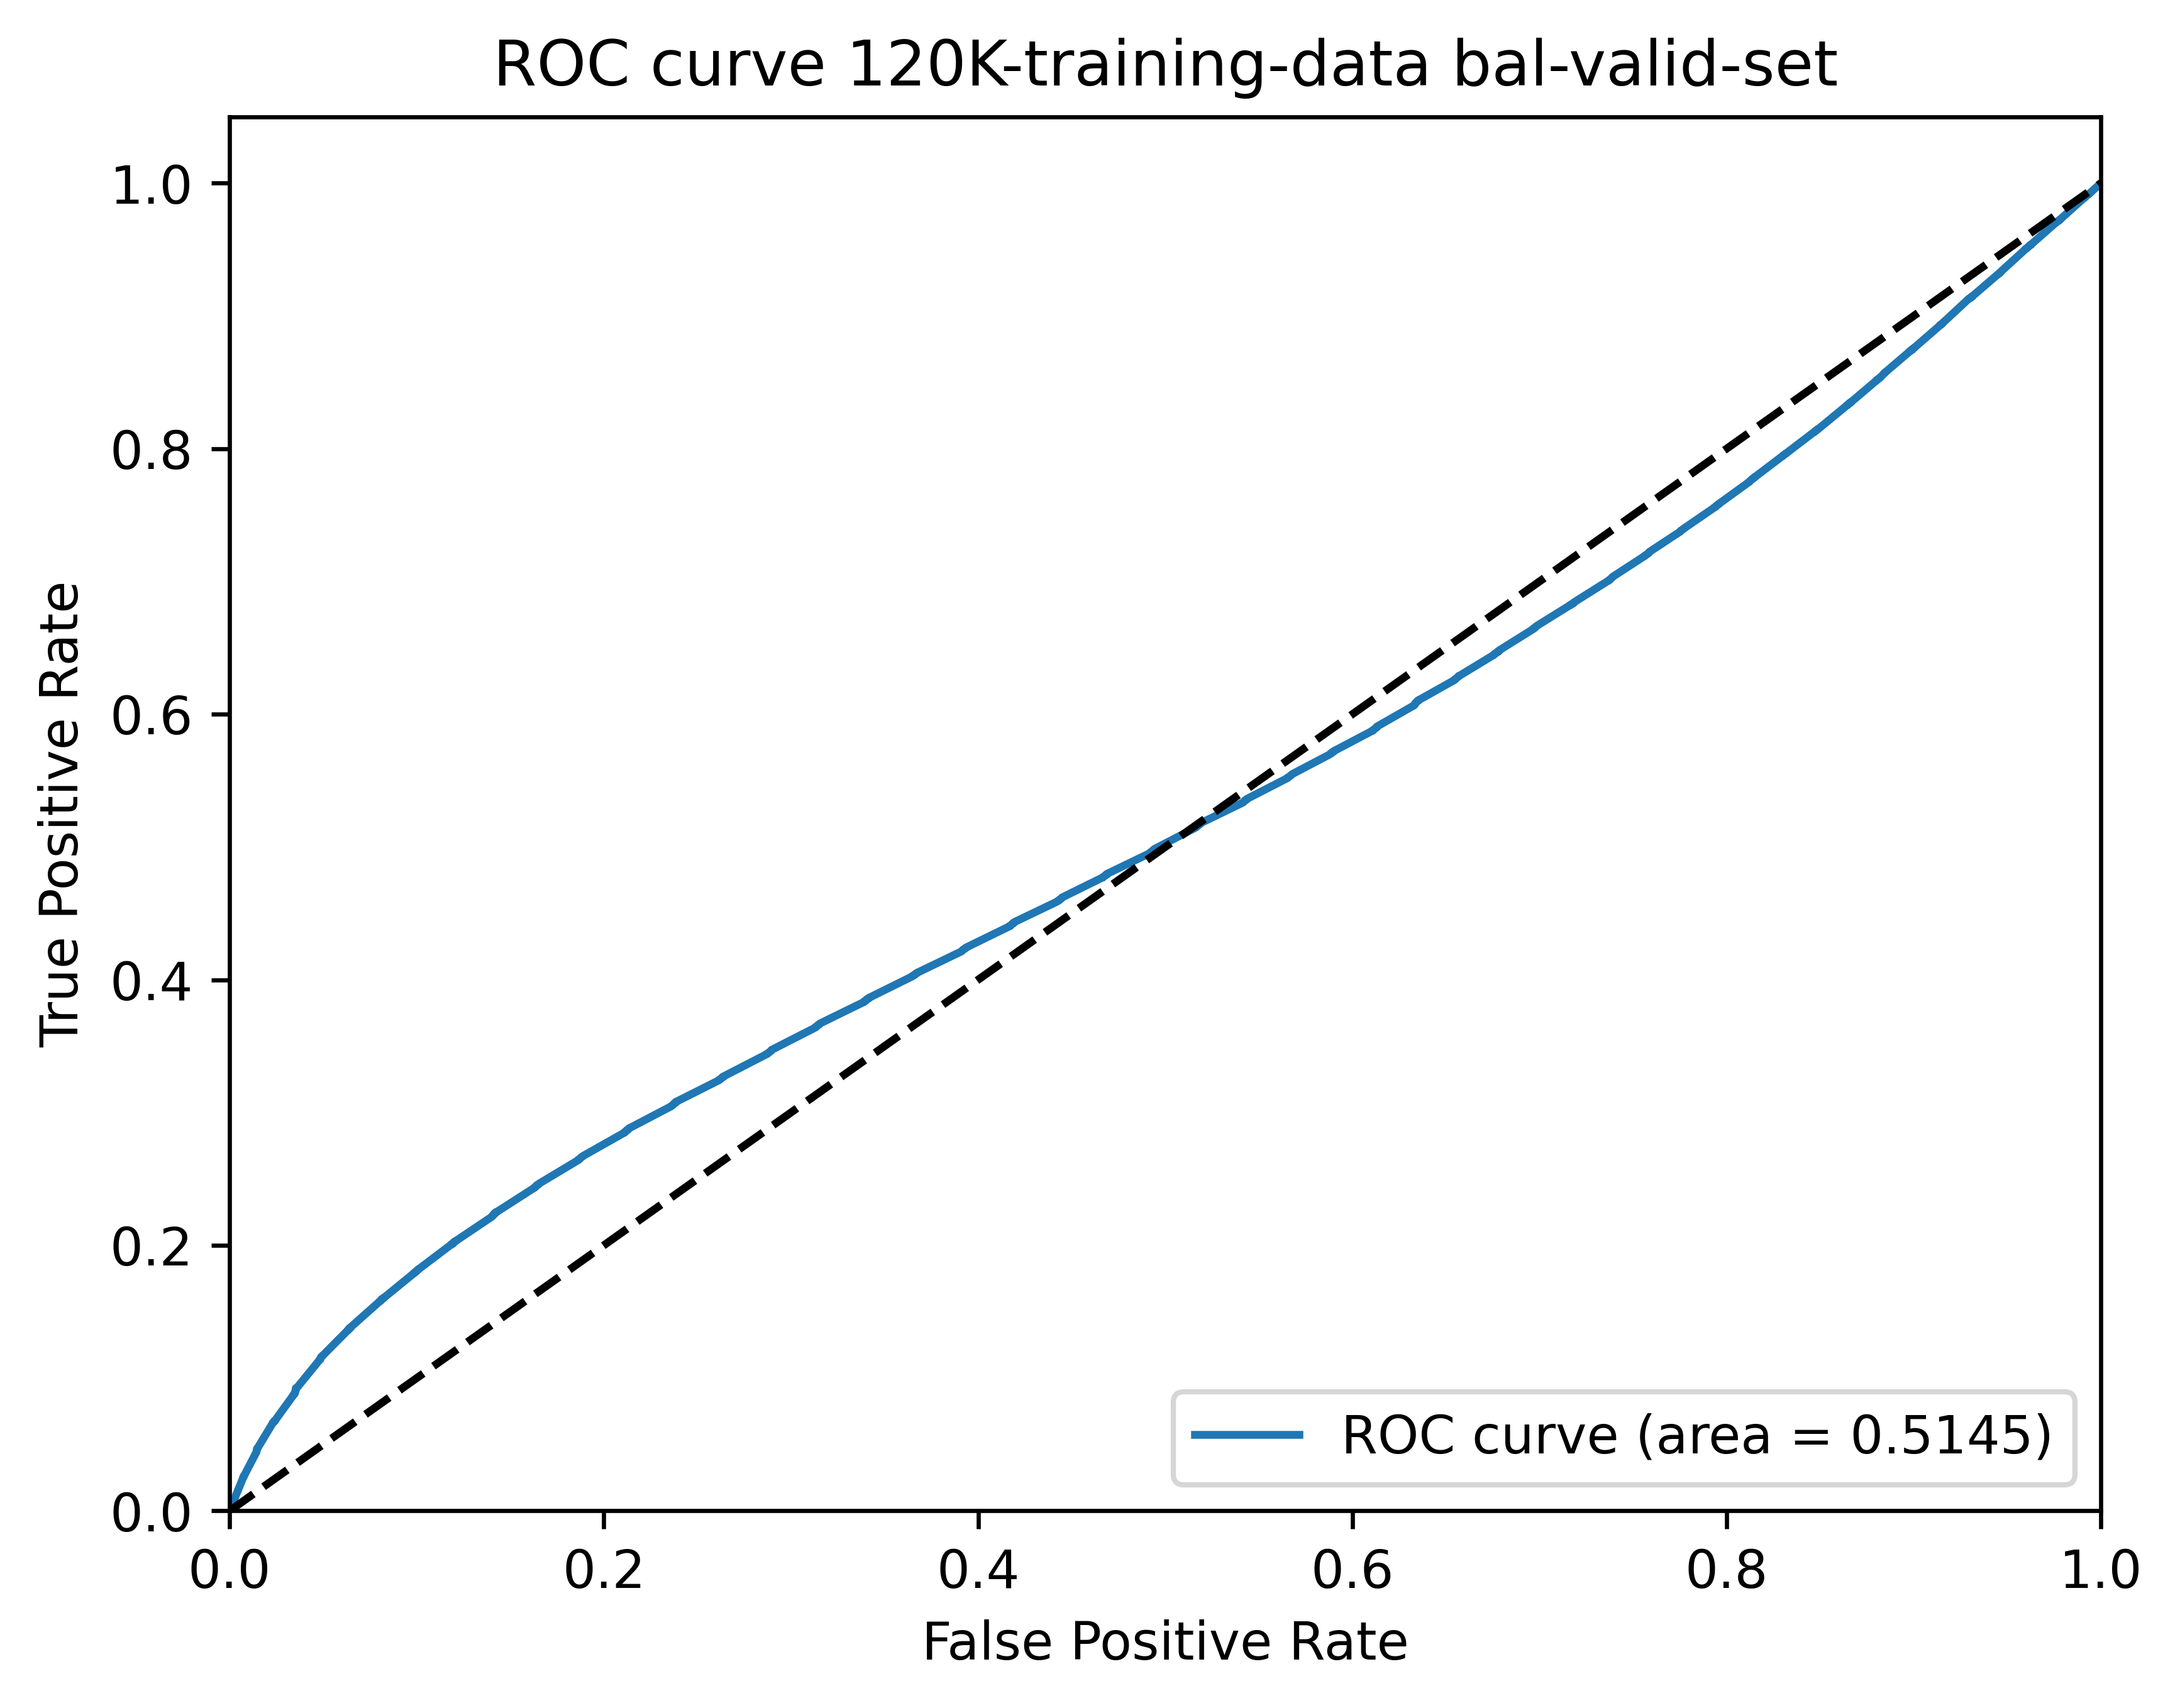

In [60]:
plot_roc_curve_binary(y_bal_valid, y_bal_valid_pred_prob, title=f'ROC curve {DATASET_LIST[DATASET_LIST_INDEX]}K-training-data bal-valid-set', save=False)

on fixed imbalanced validation set

In [61]:
y_imbal_valid_pred_prob_raw = pipeline_test.predict_proba(X_imbal_valid)

y_imbal_valid_pred = np.argmax(y_imbal_valid_pred_prob_raw, axis=1)

y_imbal_valid_pred_prob = y_imbal_valid_pred_prob_raw if len(np.unique(y_imbal_valid_pred)) > 2 \
                else np.array([y_imbal_valid_pred_prob_raw[i, pred] for i, pred in enumerate(list(y_imbal_valid_pred))])

In [62]:
print_classification_report(y_imbal_valid, y_imbal_valid_pred)

Classification report: 
               precision    recall  f1-score   support

           0       0.43      0.83      0.57    150928
           1       0.96      0.78      0.86    774377

    accuracy                           0.79    925305
   macro avg       0.70      0.81      0.72    925305
weighted avg       0.87      0.79      0.82    925305



TN - True Negative 125670
FN - False Negative 166597
TP - True Positive 607780
FP - False Positive 25258
Accuracy Rate: 0.7926575561571589
Misclassification Rate: 0.207342443842841
F1-Score: 0.7153959975301669
ROC-AUC 0.808755933479703


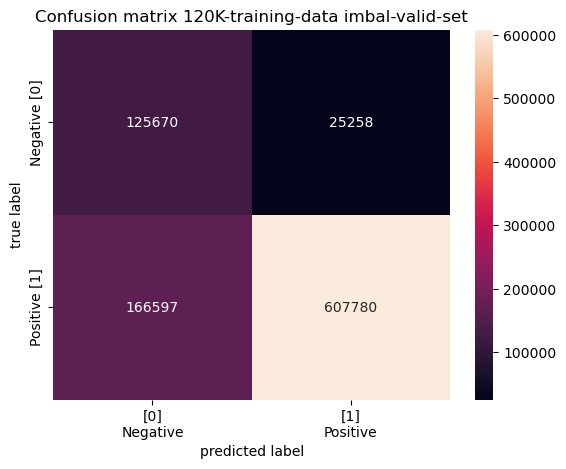

In [63]:
create_confusion_matrix_graph(y_imbal_valid, y_imbal_valid_pred, f'Confusion matrix {DATASET_LIST[DATASET_LIST_INDEX]}K-training-data imbal-valid-set', save=False)

0.5159886136364562


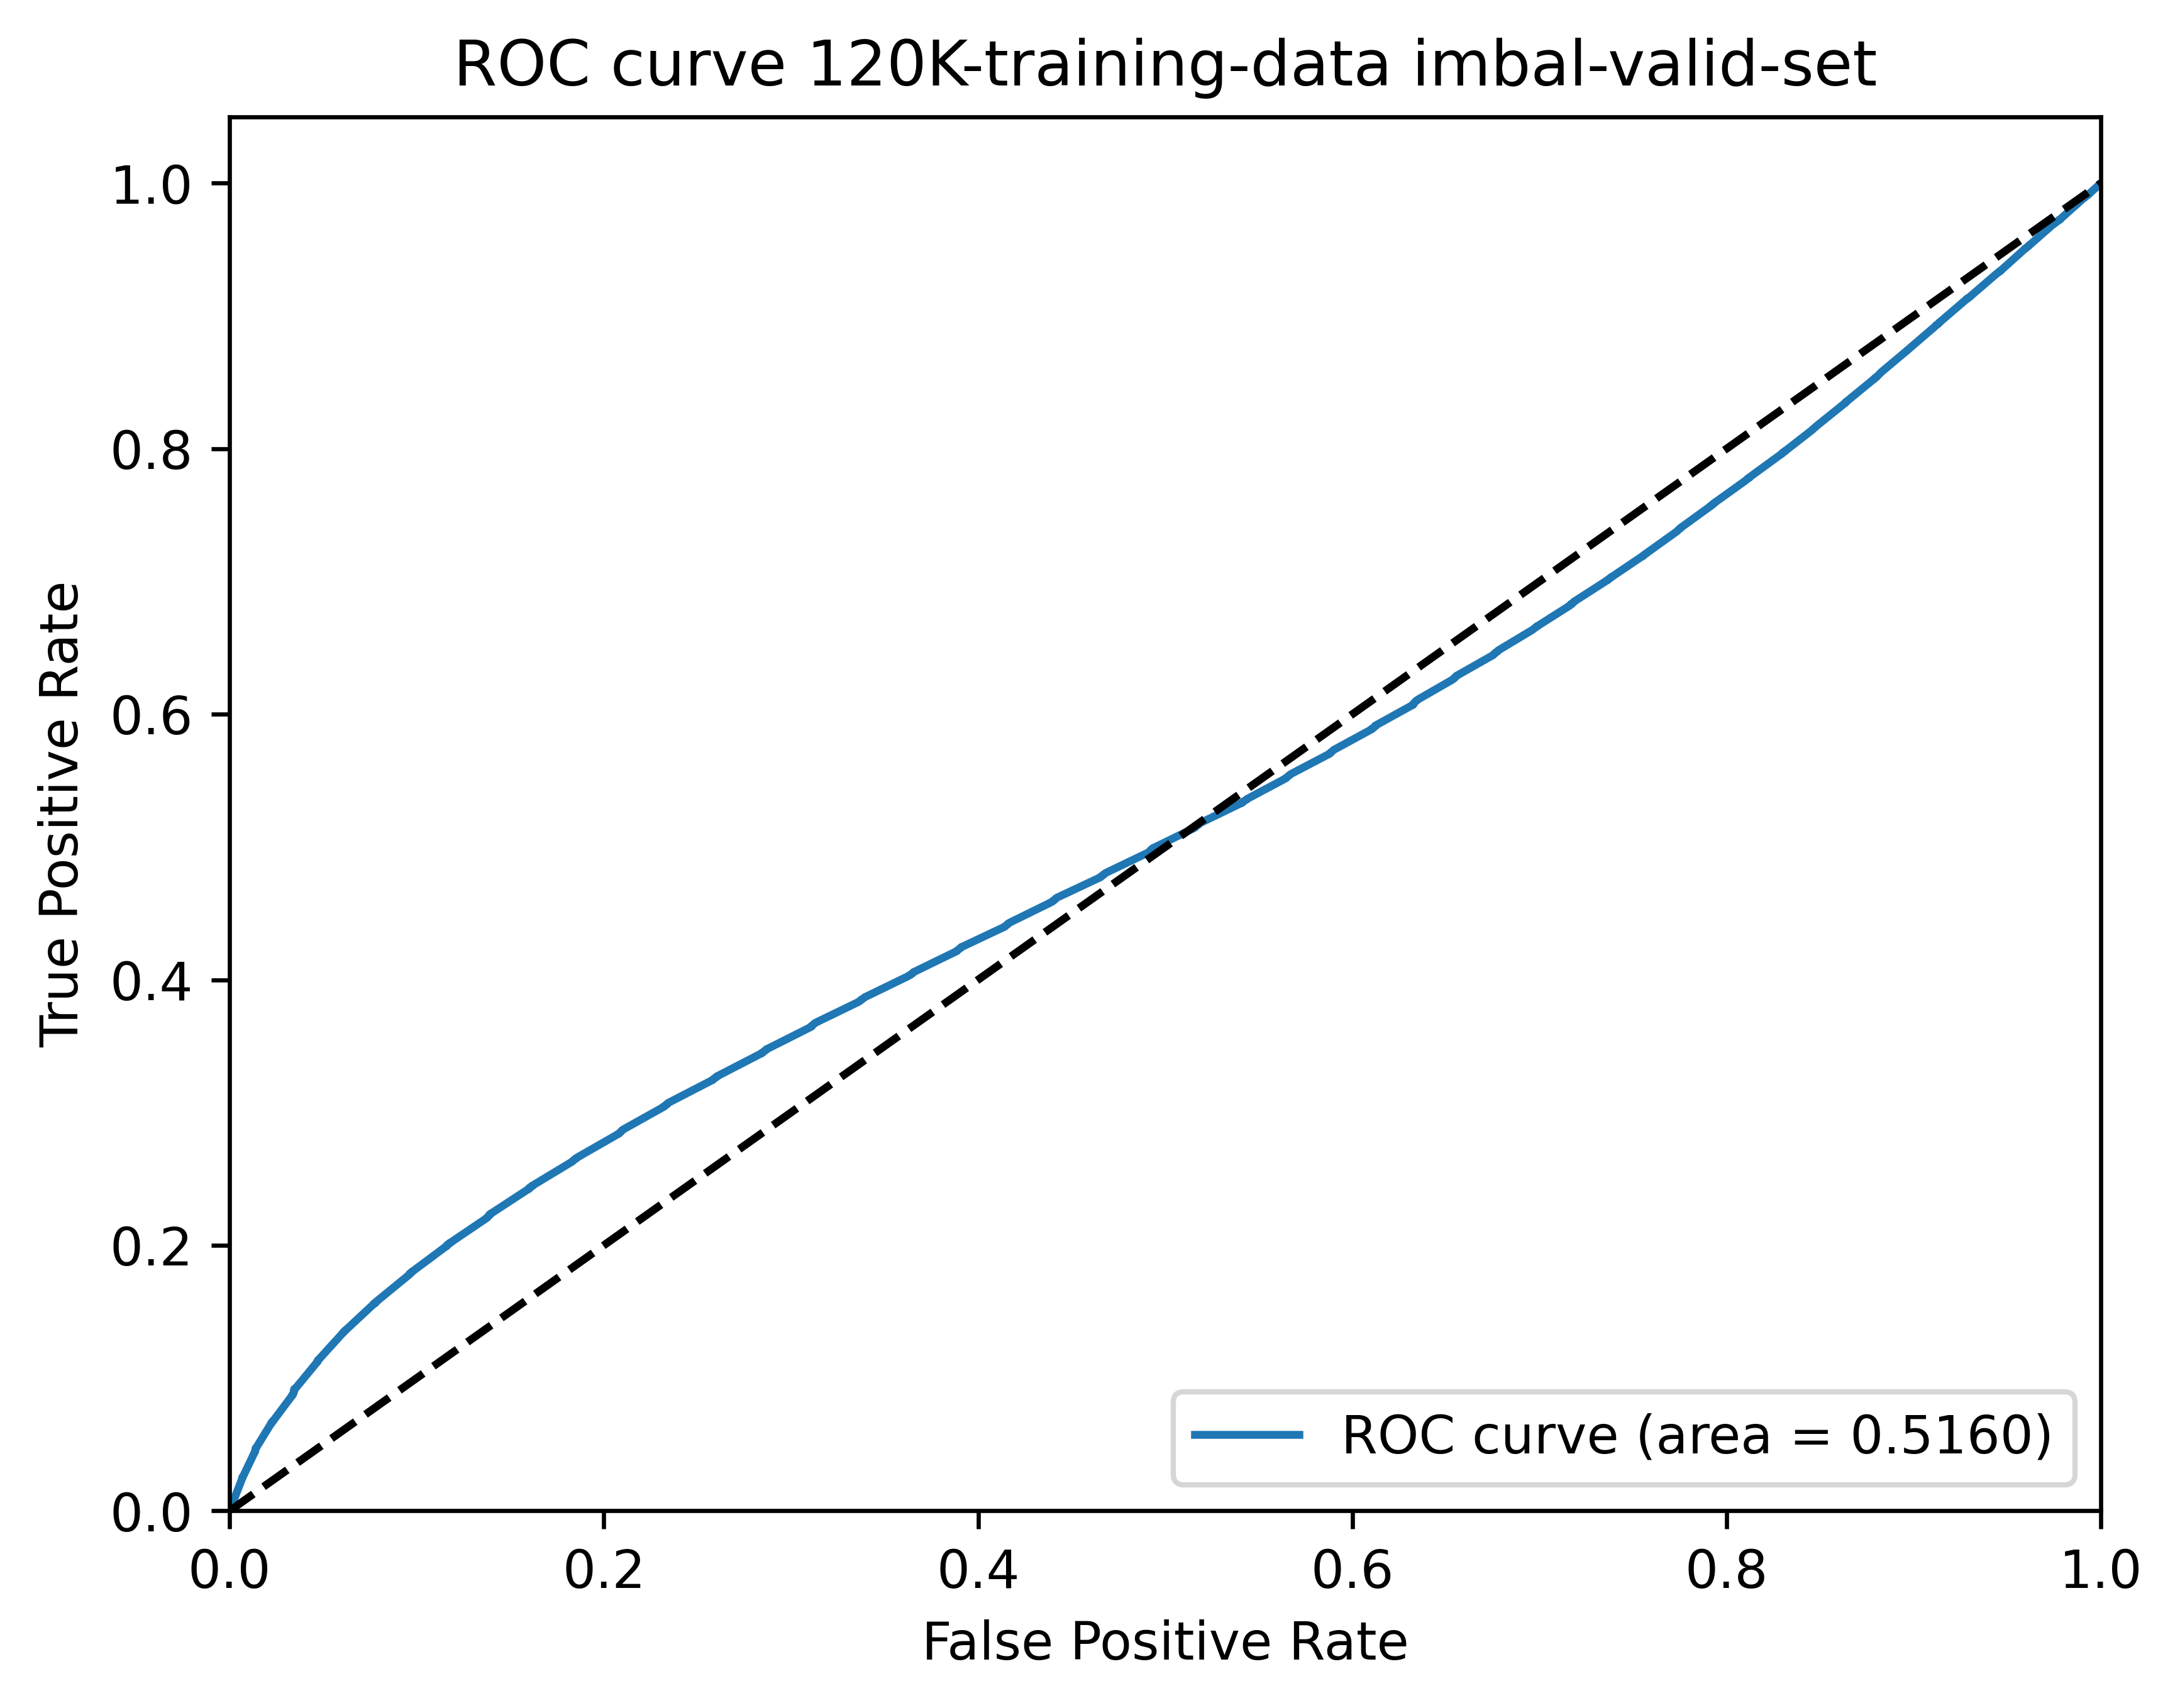

In [64]:
plot_roc_curve_binary(y_imbal_valid, y_imbal_valid_pred_prob, title=f'ROC curve {DATASET_LIST[DATASET_LIST_INDEX]}K-training-data imbal-valid-set', save=False)